In [2]:
import cv2
import numpy as np

# 두 이미지 불러오기
image1 = cv2.imread('1.jpg')
image2 = cv2.imread('1_2.jpg')

# 이미지를 그레이스케일로 변환
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# 두 이미지의 차이 계산
diff = cv2.absdiff(gray1, gray2)

# 차이 이미지를 이진화하여 강조
_, diff_thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# 창 이름 설정
window_name = 'Difference'

# 창 생성 및 크기 조절 가능하게 설정
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)

# 창의 크기 설정 (width, height)
cv2.resizeWindow(window_name, 800, 600)

# 결과 이미지 시각화
cv2.imshow(window_name, diff_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
diff_thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
gray1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
import numpy as np

# 0이 아닌 값의 인덱스 위치 찾기
non_zero_indices = np.argwhere(diff_thresh != 0)

# 리스트 형태로 변환
non_zero_indices_list = [tuple(index) for index in non_zero_indices]

# 결과 출력
print("0이 아닌 값의 인덱스 위치들:", non_zero_indices_list)


0이 아닌 값의 인덱스 위치들: [(531, 551), (532, 549), (532, 550), (532, 551), (532, 552), (533, 548), (533, 549), (533, 550), (533, 551), (533, 552), (533, 553), (534, 546), (534, 547), (534, 548), (534, 549), (534, 550), (534, 551), (534, 552), (534, 553), (535, 546), (535, 547), (535, 548), (535, 549), (535, 550), (535, 551), (535, 552), (535, 553), (536, 545), (536, 546), (536, 547), (536, 548), (536, 549), (536, 550), (536, 551), (537, 544), (537, 545), (537, 546), (537, 547), (537, 548), (537, 549), (538, 543), (538, 544), (538, 545), (538, 546), (538, 547), (538, 548), (539, 529), (539, 530), (539, 531), (539, 543), (539, 544), (539, 545), (539, 546), (539, 547), (539, 548), (540, 528), (540, 529), (540, 530), (540, 531), (540, 532), (540, 542), (540, 543), (540, 544), (540, 545), (540, 546), (540, 547), (541, 527), (541, 528), (541, 529), (541, 530), (541, 531), (541, 532), (541, 533), (541, 542), (541, 543), (541, 544), (541, 545), (541, 546), (542, 527), (542, 528), (542, 529), (542, 530

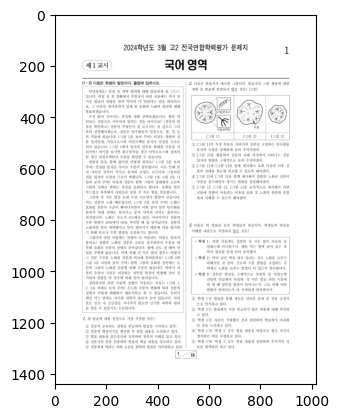

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image2)

In [7]:
color_image = cv2.cvtColor(diff_thresh, cv2.COLOR_GRAY2BGR)

# 0이 아닌 값의 위치를 원으로 시각화
for index in non_zero_indices:
    y, x = index
    cv2.circle(color_image, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

# 결과 이미지 출력
cv2.imshow('Non-zero Indices Visualization', color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
len(non_zero_indices_list)

592

In [16]:
num_list = []
for i in range(len(non_zero_indices_list)):
    if i == 0:
        continue
    elif abs(non_zero_indices_list[i][0] - non_zero_indices_list[i-1][0]) > 100 or abs(non_zero_indices_list[i][1] - non_zero_indices_list[i-1][1]) > 100:
        num_list.append(i)
    else:
        continue

In [20]:
var1 = non_zero_indices_list[:num_list[0]]
var2 = non_zero_indices_list[num_list[0]:num_list[1]]
var3 = non_zero_indices_list[num_list[1]:]

In [21]:
M_X = 0
m_X = 100000
M_Y = 0
m_Y = 100000

for i in range(len(var1)):
    if var1[i][0] > M_X:
        M_X = var1[i][0]
    if var1[i][0] < m_X:
        m_X = var1[i][0]
    if var1[i][1] > M_Y:
        M_Y = var1[i][1]
    if var1[i][1] < m_Y:
        m_Y = var1[i][1]
        
print(M_X, m_X, M_Y, m_Y)

554 531 553 527


In [42]:
def make_bounding_box(var1):
    M_X = 0
    m_X = 100000
    M_Y = 0
    m_Y = 100000

    for i in range(len(var1)):
        if var1[i][0] > M_X:
            M_X = var1[i][0]
        if var1[i][0] < m_X:
            m_X = var1[i][0]
        if var1[i][1] > M_Y:
            M_Y = var1[i][1]
        if var1[i][1] < m_Y:
            m_Y = var1[i][1]
            
    print(M_X, m_X, M_Y, m_Y)
    return M_X+10, m_X, M_Y, m_Y

In [45]:
M_X, m_X, M_Y, m_Y = make_bounding_box(var3)

1259 1237 141 114


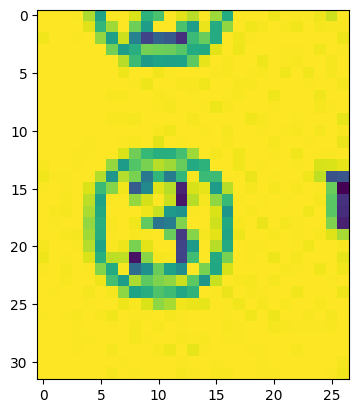

In [46]:
plt.imshow(gray2[m_X:M_X, m_Y:M_Y])

In [47]:
from paddleocr import PaddleOCR

ocr = PaddleOCR()
test = gray2[m_X:M_X+10, m_Y:M_Y]
result = ocr.ocr(test)

[2024/05/25 11:22:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\dlwns/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\dlwns/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [56]:
result

[[[[[4.0, 12.0], [19.0, 12.0], [19.0, 28.0], [4.0, 28.0]],
   ('③', 0.9152535200119019)],
  [[[7.0, 35.0], [14.0, 35.0], [14.0, 41.0], [7.0, 41.0]],
   ('4', 0.9540285468101501)]]]

In [58]:
circle_num = ['①','②','③','④','⑤']
for data in result[0]:
    if data[1][0] in circle_num:
        print(data[1][0])

③
